##Carga de librerías

In [52]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [53]:
import pandas as pd
import os
import numpy as np

##Carga de base de datos principal para moleculas  (molecule)


In [54]:
#Comma separated value text file containing
#information on molecules used for HOMO-LUMO GP calibration

data5 = pd.read_csv('../../db/mmc5.csv')
data5.head()



,key,smiles,HOMO_exp,LUMO_exp,HOMO_calc,LUMO_calc
0,c7,CN(C1=O)C(C2C=C(OC)C3=C(C2=C1C=C4)C4=C5C6=C3C=...,-5.48,-3.84,-5.506927,-3.057544
1,c9,O=C(C1=C2C3=C(C=CC24)C5=C(C6=C7C=C5)C(CC=C6C(N...,-5.71,-3.71,-5.654385,-3.066683
2,c10,O=C(C1=C2C3=C(C(C(C=C4C(N(C(C)C)C5=O)=O)C6=C7C...,-5.94,-3.84,-5.716410,-3.307659
3,c14,O=C(C1=C2C(C(C3=C4C(C5C6=C7C=CC(C(N(C(C)C)C8=O...,-5.81,-3.61,-5.770852,-3.071316
4,d1,O=C1C(C2=C(C3=CC=C(S3)C4=CC=C(C(F)(F)F)C=C4)N1...,-5.26,-3.52,-5.280874,-3.223849


In [55]:
#– Comma separated value text file containing information
#on molecules used for PCE GP calibration

data6 = pd.read_csv('../../db/mmc6.csv')
data6.head()

,key,name,donor,smiles,HOMO_calc,LUMO_calc,PCE_exp,Source,HOMO_calib,LUMO_calib,PCE_calc,PCE_calib,molW,PCE_calib_plus,PCE_calib_plus_std
0,1,1,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6ccc(c7ccc(...,-6.2060,-3.7565,0.25,NaN,-5.769127,-3.818783,2.746719,5.858438,418.408,1.376496,1.331254
1,2,2,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(-n6c(=O)c7ccc8c9ccc...,-6.2310,-3.8095,3.20,NaN,-5.918082,-4.044682,2.737661,4.883912,806.746,2.130566,1.275193
2,3,3,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc(...,-6.0405,-3.8651,0.41,NaN,-5.750096,-3.868918,3.900138,6.141742,916.927,2.298419,1.280298
3,4,4,P3HT,COc1cc2c(=O)n(C)c(=O)c3ccc4c5c(-c6ccc(-c7cc8c(...,-5.7617,-3.6931,0.76,NaN,-5.654797,-3.843035,5.592203,7.021113,1037.031,2.560097,1.292685
4,5,5,P3HT,Cn1c(=O)c2ccc3c4ccc5c(=O)n(C)c(=O)c6cc(-c7ccc8...,-5.9508,-3.7279,2.35,NaN,-5.733852,-3.721853,4.204648,5.937610,1149.187,2.793039,1.296141


In [56]:
#Machine Learning

In [57]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   key        94 non-null     object 
 1   smiles     94 non-null     object 
 2   HOMO_exp   94 non-null     float64
 3   LUMO_exp   94 non-null     float64
 4   HOMO_calc  94 non-null     float64
 5   LUMO_calc  94 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


<AxesSubplot:>

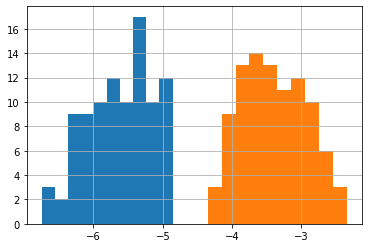

In [58]:
data5['HOMO_exp'].hist()
data5['LUMO_exp'].hist()

<AxesSubplot:>

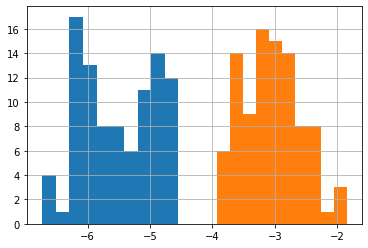

In [59]:
data5['HOMO_calc'].hist()
data5['LUMO_calc'].hist()

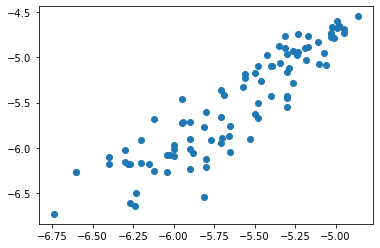

In [60]:
plt.scatter(data5['HOMO_exp'], data5['HOMO_calc'])

##gaussian Process

0.8491609886462796
0.1767655605326515


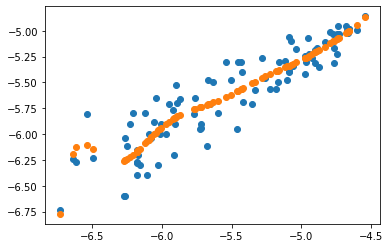

In [61]:
X = data5['HOMO_calc']
y = data5['HOMO_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


gpr = GaussianProcessRegressor()


X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

kf = KFold(n_splits=32, shuffle=True, random_state=25)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['HOMO_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['HOMO_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['HOMO_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['HOMO_exp']).reshape(-1, 1)
    #Train the model
    gpr.fit(X_train, y_train) #Training the model

predict = gpr.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)

import joblib
filename = 'gaussianProcessTrained-HOMO.sav'
joblib.dump(gpr, filename)


plt.show()

In [62]:
homo_exp_andres = pd.DataFrame(predict, columns=['HOMO_cal_projecto'])
homo_exp = pd.DataFrame(y, columns=['HOMO_exp'])

In [63]:
homo_data =  pd.concat([homo_exp_andres, homo_exp], axis=1, sort=False)
homo_data

,HOMO_cal_projecto,HOMO_exp
0,-5.620133,-5.480000
1,-5.706546,-5.710000
2,-5.735388,-5.940000
3,-5.760124,-5.810000
4,-5.457854,-5.260000
...,...,...
89,-6.143156,-6.300093
90,-6.258595,-6.600097
91,-5.693955,-5.500081
92,-6.255842,-6.600097


0.8491932157359092
0.1624197395494662


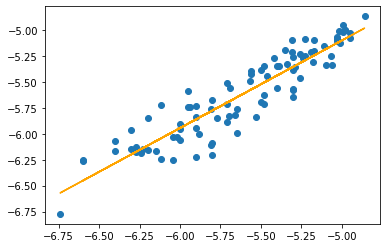

In [68]:
from sklearn.linear_model import LinearRegression
y = homo_exp_andres
X = homo_exp

reg = LinearRegression().fit(X, y)
predict = reg.predict(X)
print(reg.score(X, y))
print(mean_squared_error(y, predict)**(1/2))

plt.scatter(X,y)
plt.plot(X,predict, color='orange')
plt.show()

0.6231594737358999
0.8400041477570692


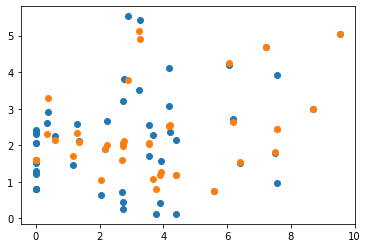

In [67]:
X = data6['PCE_calc']
y = data6['PCE_exp']

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import KFold

X_val = np.array(X).reshape(-1, 1)
y_val = np.array(y).reshape(-1, 1)

gprPCE = GaussianProcessRegressor()


kf = KFold(n_splits=25, shuffle=True, random_state=53)
homo_df = pd.concat([X, y], axis=1, sort=False)

for train_index, test_index in kf.split(homo_df):
    X_train = np.array(homo_df.iloc[train_index]['PCE_calc']).reshape(-1, 1)
    X_test = np.array(homo_df.iloc[test_index]['PCE_calc']).reshape(-1, 1)
    y_train = np.array(homo_df.iloc[train_index]['PCE_exp']).reshape(-1, 1)
    y_test = np.array(homo_df.loc[test_index]['PCE_exp']).reshape(-1, 1)
    #Train the model
    gprPCE.fit(X_train, y_train) #Training the model

predict = gprPCE.predict(X_val)

plt.scatter(X, y)
print(gpr.score(X_val, y_val))
print(mean_squared_error(y_val, predict)**(1/2))
plt.scatter(X_val, predict)


import joblib
filename = 'gaussianProcessTrained-PCE.sav'
joblib.dump(gpr, filename)

plt.show()